# Model Prediction for Online Shopping Customer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost
data = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone1/online_shoppers_intention.csv')
data.head()
Purchase = data[data.Revenue == True]
Browse = data[data.Revenue == False]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
X = data.drop(columns='Revenue')
y = data['Revenue']

In [9]:
cleanup_cat = {'VisitorType': {'New_Visitor':0,'Returning_Visitor': 1,  'Other':2},
 'Month': {'Feb':0, 'Mar':1, 'May':2, 'June':3, 'Jul':4, 'Aug':5, 'Sep':6, 'Oct':7, 'Nov':8, 'Dec':9}}
X.replace(cleanup_cat, inplace=True)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,1,1,1,1,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,2,2,1,2,1,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,4,1,9,3,1,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,3,2,2,4,1,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,3,3,1,4,1,True


#### Creating a Test and Training Dataset

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=18)

#### Model Choice

I have choosen to choose 4 different types of prediction models and test which model will perform the best. The k nearest neighbour and logistic regression problems are the simplest methods to begin with and I would like to show the difference between the model prediction accuracy for those two models compared to the more intensive ML algorithms with the random forrest and xgboost models.

In [11]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(solver='lbfgs')
xgboost = XGBClassifier()
randomforest = RandomForestClassifier()
knn.fit(X_train, y_train)
logreg.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
randomforest.fit(X_train,y_train)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Cross-Validation before Parameter Tuning

In [8]:
cv_results_knn = cross_val_score(knn, X, y, cv=5)
cv_results_logreg = cross_val_score(logreg, X, y, cv=5)
cv_results_xgb = cross_val_score(xgboost, X, y, cv=5)
cv_results_randomforest = cross_val_score(randomforest, X, y, cv=5)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\C

In [9]:
print("KNeighbors Accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_results_knn), np.std(cv_results_knn) * 2))

KNeighbors Accuracy: 0.86 (+/- 0.03)


In [10]:
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_results_logreg), np.std(cv_results_logreg) * 2))

Logistic Regression Accuracy: 0.88 (+/- 0.01)


In [11]:
print("XGBoost Accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_results_xgb), np.std(cv_results_xgb) * 2))

XGBoost Accuracy: 0.90 (+/- 0.03)


In [12]:
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (np.mean(cv_results_randomforest), np.std(cv_results_randomforest) * 2))

Random Forest Accuracy: 0.89 (+/- 0.03)


#### Parameter Tuning

Hyperparameters optimization is a way to obtain model values that we set before training any model using a machine learning method. Hyperparameters are described as model characteristics that cannot be estimated from the data, unlike model parameters. In order to better have confidence in our model output, we need to be sure that we use the best possible model at our disposal with high model characteristics. Hyperparameters can, however, be used to estimate the value of model parameters. Since there is no methodology to estimate the hyperparameters, we are left with no choice but to use trial & error and come up with a value that has better model characteristics as opposed to choosing some other value. In the below code, I’ve used the grid search algorithm in python to estimate my various model parameters such as nodes of a tree, learning rate, etc. which uses all the possible combinations available in the range of my input to come up with the optimal hyperparameter values with best model accuracy.

In [21]:
param_grid_knn = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid_knn, cv=5)
knn_cv.fit(X_train,y_train)
print('Best n: ', knn_cv.best_params_['n_neighbors'])
print('Best Score: ', knn_cv.best_score_)

Best n:  6
Best Score:  0.871654501216545


In [32]:
param_grid_logreg = {'C': np.logspace(-5, 1, 10), 'penalty': ['l1','l2']}
logreg_cv = GridSearchCV(logreg, param_grid_logreg, cv=5,solver='lbfgs')
logreg_cv.fit(X_train,y_train)
print('Best penalty: ', logreg_cv.best_params_['penalty'])
print('Best C: ', logreg_cv.best_params_['C'])
print('Best Score: ', logreg_cv.best_score_)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\C

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\C

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.thabane\AppData\Local\C

Best penalty:  l1
Best C:  0.00021544346900318823
Best Score:  0.8876723438767234


C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
param_gridxgboost= {'learning_rate': np.arange(0.05,0.3,0.05),'max_depth': np.arange(3,12,2),
                    'min_child_weight': np.arange(1,8,2),'gamma': np.arange(0,0.5,0.1),
                    'colsample_bytree': np.arange(0.3,0.8,0.1),'n_estimators': np.arange(100,1000,200)}
xgboost_cv = GridSearchCV(xgboost,param_gridxgboost,cv=5)
xgboost_cv.fit(X_train,y_train)
print('Best learning rate: ', xgboost_cv.best_params_['learning_rate'])
print('Best max depth: ', xgboost_cv.best_params_['max_depth'])
print('Best minimum child weight: ', xgboost_cv.best_params_['min_child_weight'])
print('gamma: ', xgboost_cv.best_params_['gamma'])
print('colsample by tree: ', xgboost_cv.best_params_['colsample_bytree'])
print('n_estimators: ', xgboost_cv.best_params_['n_estimators'])
print('Best Score: ', xgboost_cv.best_score_)

Best learning rate:  0.05
Best max depth:  3
Best minimum child weight:  1
gamma:  0.1
colsample by tree:  0.6000000000000001
n_estimators:  300
Best Score:  0.9087591240875912


In [39]:
param_grid_RF = {'n_estimators': np.arange(100,1000,200), 'max_depth': np.arange(5,30,5), 
                 'min_samples_split': np.arange(2,21,5), 'min_samples_leaf': np.arange(1,10,2)}
RF_cv = GridSearchCV(randomforest,param_grid_RF,cv=5)
RF_cv.fit(X_train,y_train)
print('Best n estimator: ', RF_cv.best_params_['n_estimators'])
print('Best max depth: ', RF_cv.best_params_['max_depth'])
print('Best min sample split: ', RF_cv.best_params_['min_samples_split'])
print('Best min sample leaf: ', RF_cv.best_params_['min_samples_leaf'])
print('Best Score: ', RF_cv.best_score_)

Best n estimator:  900
Best max depth:  20
Best min sample split:  7
Best min sample leaf:  1
Best Score:  0.9063260340632603


#### Final models using optimal parameters

In [15]:
best_knn = KNeighborsClassifier(n_neighbors=6)
best_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [16]:
best_logreg = logreg = LogisticRegression(penalty='l1',C=np.logspace(-5, 1, 10)[2],solver='lbfgs')
best_logreg.fit(X_train,y_train)

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.00021544346900318823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
best_xgboost = XGBClassifier(learning_rate=0.05,max_depth=3,min_child_weight=1,gamma=0.1,
                             colsample_bytree=0.6,n_estimators=300)
best_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
best_RF = RandomForestClassifier(n_estimators=900,max_depth=20,min_samples_split=7,min_samples_leaf=1)
best_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### ROC curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
y_pp_knn = best_knn.predict_proba(X_test)[:,1]
y_pp_logreg = best_logreg.predict_proba(X_test)[:,1]
y_pp_xgboost = best_xgboost.predict_proba(X_test)[:,1]
y_pp_RF = best_RF.predict_proba(X_test)[:,1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pp_knn) 
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pp_logreg)
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(y_test, y_pp_xgboost)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pp_RF)

plt.rcParams['figure.figsize'] = [14, 7]
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_knn,tpr_knn,label='KNN',c='r')
plt.plot(fpr_logreg,tpr_logreg,label='Logistic Regression',c='b')
plt.plot(fpr_xgboost,tpr_xgboost,label='XGBoost',c='g')
plt.plot(fpr_RF,tpr_RF,label='Random Forest',c='y')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

Model Performance can be examined by the ROC curve which plots the True Positive Rate against the False Positive Rate. The ROC curve of the best model will be high fitted closest to the top left corner of the ROC plot. As we can see the XGBoost and Random Forrest Models perform the best when predicting the customers activity on the online website.

#### Precision-recall curve

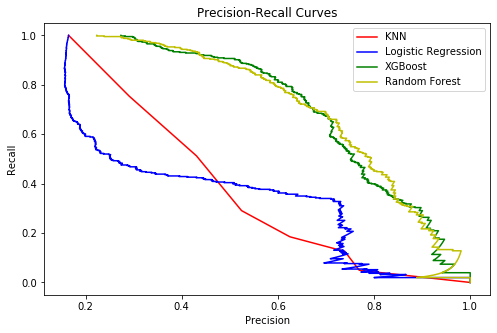

In [88]:
precision_knn, recall_knn, threshold_knn = precision_recall_curve(y_test, y_pp_knn) 
precision_logreg, recall_logreg, threshold_logreg = precision_recall_curve(y_test, y_pp_logreg)
precision_xgboost, recall_xgboost, threshold_xgboost = precision_recall_curve(y_test, y_pp_xgboost)
precision_RF, recall_RF, threshold_RF = precision_recall_curve(y_test, y_pp_RF)

plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(precision_knn,recall_knn,label='KNN',c='r')
plt.plot(precision_logreg,recall_logreg,label='Logistic Regression',c='b')
plt.plot(precision_xgboost,recall_xgboost,label='XGBoost',c='g')
plt.plot(precision_RF,recall_RF,label='Random Forest',c='y')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curves')
plt.legend()

The Precision-Recall Curve is also another method of showing model accuracy. It plots the recall (number of true positives over the sum of true positives and false negatives)  precision (number of true positives over the sum of true positives and false positives). The most accurate model will have the line located as far to the top right corner of the plot. From the above plot we can see the XGBoost model and the Random Forrest model are very similar and strong in accuracy of prediction the purchasing customer.

#### Confusion Matrix Describing Accuracy of Model Predictions

In [78]:
from sklearn.metrics import confusion_matrix
y_pred_knn = best_knn.predict(X_test)
y_pred_logreg = best_logreg.predict(X_test)
y_pred_xgboost = best_xgboost.predict(X_test)
y_pred_RF = best_RF.predict(X_test)
df_knn = pd.DataFrame(confusion_matrix(y_test,y_pred_knn), index = ['Browse','Purchase'], columns = ['Browse','Purchase'])
df_logreg = pd.DataFrame(confusion_matrix(y_test,y_pred_logreg), index = ['Browse','Purchase'], 
                         columns = ['Browse','Purchase'])
df_xgboost = pd.DataFrame(confusion_matrix(y_test,y_pred_xgboost), index = ['Browse','Purchase'], 
                          columns = ['Browse','Purchase'])
df_RF = pd.DataFrame(confusion_matrix(y_test,y_pred_RF), index = ['Browse','Purchase'], columns = ['Browse','Purchase'])

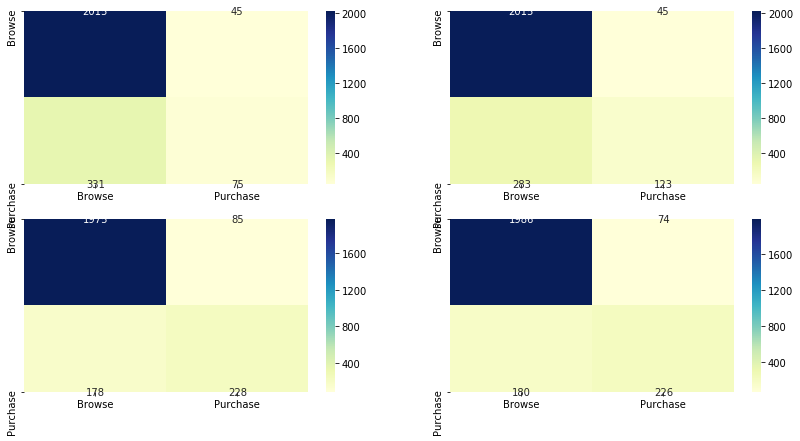

In [106]:
plt.rcParams['figure.figsize'] = [14, 7]
fig, ax = plt.subplots(2,2)
sns.heatmap(df_knn,annot=True,fmt='d',cmap="YlGnBu" ,ax=ax[0,0])
sns.heatmap(df_logreg,annot=True,fmt='d',cmap="YlGnBu",ax=ax[0,1])
sns.heatmap(df_xgboost,annot=True,fmt='d',cmap="YlGnBu",ax=ax[1,0])
sns.heatmap(df_RF,annot=True,fmt='d',cmap="YlGnBu",ax=ax[1,1])
plt.show()

From the above heatmap of the confusion matrix it is hard to tell which model is the best at classification since all models seem to have a similar amounnt of misclassifications. However the KNN and Logistic Regression model have generated the most False Negatives comepared to the generated false Positives. 

#### Importance of Parameters

The xboost and Random Forrest plots allow us to determine which parameters are the most inportant in predicting the outcome of interest. The below code will show parameters with the highest values have the most significant impact on the Online Shoppers likelihood to make a Purchase or not.

In [14]:
sorted_idx = np.argsort(best_xgboost.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], best_xgboost.feature_importances_[index]])

['PageValues', 0.5072776]
['Month', 0.078832574]
['BounceRates', 0.065999046]
['ExitRates', 0.045520242]
['Administrative', 0.04255423]
['ProductRelated', 0.041459087]
['VisitorType', 0.041039262]
['ProductRelated_Duration', 0.04068779]
['Administrative_Duration', 0.026304374]
['SpecialDay', 0.024347754]
['Informational_Duration', 0.01609661]
['TrafficType', 0.016063038]
['Informational', 0.01348208]
['Region', 0.011102518]
['OperatingSystems', 0.010195555]
['Weekend', 0.009922537]
['Browser', 0.009115764]


In [20]:
sorted_idx = np.argsort(best_RF.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], best_RF.feature_importances_[index]])

['PageValues', 0.443805383271199]
['ExitRates', 0.08305336083207995]
['ProductRelated_Duration', 0.08225428686196723]
['ProductRelated', 0.06628978501171486]
['BounceRates', 0.055046148911439746]
['Administrative_Duration', 0.053519541857449345]
['Month', 0.041695432769072685]
['Administrative', 0.0394096727887057]
['Informational_Duration', 0.024097167660820793]
['TrafficType', 0.023778636559325248]
['Region', 0.02260835245715478]
['Browser', 0.015130269193714546]
['Informational', 0.01417857544939324]
['OperatingSystems', 0.013430324782681493]
['VisitorType', 0.011406667833497187]
['Weekend', 0.007151462341463236]
['SpecialDay', 0.0031449314183210875]


Based the the numbers above it is very clear that Online Shoppers Page rates have the greatest impact on whether the customer will make a purchase or not. Both models also consider customer BounceRates and ExitRates as important paramaters as we thought based on our previous data story and hypothesis tests.